In [1]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff = 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean

    return tmp_mean,-tmp_diff

In [5]:
mix1_training_acc, mix1_training_loss, mix1_val_acc, mix1_val_loss = read_file('mix1')
mix2_training_acc, mix2_training_loss, mix2_val_acc, mix2_val_loss = read_file('mix2')


In [10]:
_mix1_training_acc = []
for i in range(0,len(mix1_training_acc),100):
    _mix1_training_acc.append(np.mean(mix1_training_acc[i:i+100]))

_mix2_training_acc = []
for i in range(0,len(mix2_training_acc),100):
    _mix2_training_acc.append(np.mean(mix2_training_acc[i:i+100]))
    
_mix1_val_acc = []
for i in range(0,len(mix1_val_acc),100):
    _mix1_val_acc.append(np.mean(mix1_val_acc[i:i+100]))

_mix2_val_acc = []
for i in range(0,len(mix2_val_acc),100):
    _mix2_val_acc.append(np.mean(mix2_val_acc[i:i+100]))

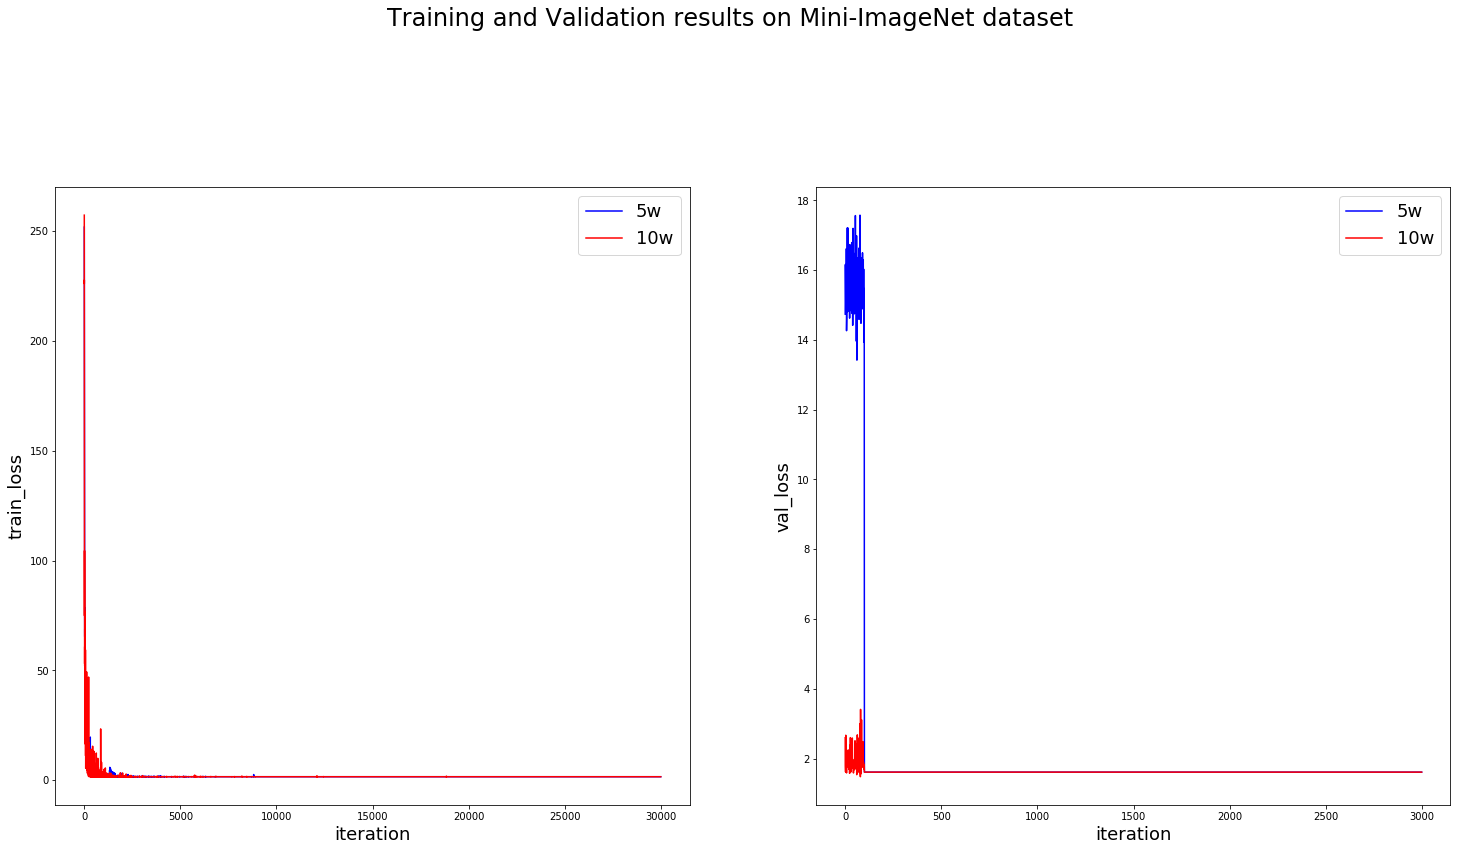

In [13]:
training = np.arange(0, 30000, 1)
val = np.arange(0,3000, 1)

fig = plt.figure(figsize=(25,25))
fig.suptitle('Training and Validation results on Mini-ImageNet dataset', fontsize=24)

plt.subplot(2, 2, 1)
plt.plot(training, mix1_training_loss,'b')
plt.plot(training, mix2_training_loss, 'r')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(val, mix1_val_loss,'b')
plt.plot(val, mix2_val_loss, 'r')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

# plt.subplot(2, 2, 3)
# plt.plot(training, _mix1_training_acc,'b')
# plt.plot(training, _mix2_training_acc, 'r')
# plt.xlabel('iteration', fontsize=18)
# plt.ylabel('loss_acc', fontsize=18)
# plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

# plt.subplot(2, 2, 4)
# plt.plot(val, _mix1_val_acc,'b')
# plt.plot(val, _mix2_val_acc, 'r')
# plt.xlabel('iteration', fontsize=18)
# plt.ylabel('loss_acc', fontsize=18)
# plt.gca().legend(('5w','20w','60w'), fontsize=18)

#fig.savefig('train_n_val.jpg')
plt.show()

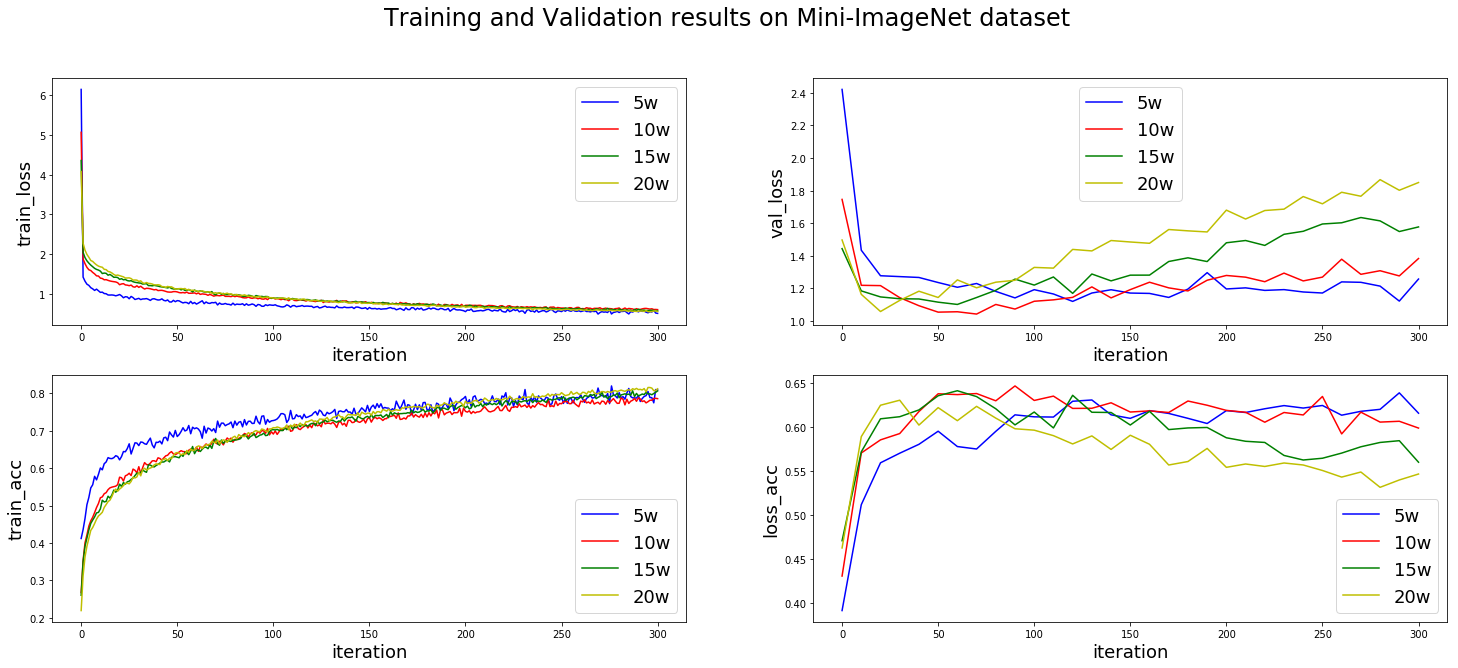

In [52]:
training = np.arange(0, 301, 1)
val = np.arange(0,301, 10)

fig = plt.figure(figsize=(25,10))
fig.suptitle('Training and Validation results on Mini-ImageNet dataset', fontsize=24)

plt.subplot(2, 2, 1)
plt.plot(training, _5w_5s_training_loss[0:301],'b')
plt.plot(training, _10w_5s_training_loss[0:301], 'r')
plt.plot(training, _15w_5s_training_loss[0:301],'g')
plt.plot(training, _20w_5s_training_loss[0:301], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(val, _5w_5s_val_loss[0:31],'b')
plt.plot(val, _10w_5s_val_loss[0:31], 'r')
plt.plot(val, _15w_5s_val_loss[0:31],'g')
plt.plot(val, _20w_5s_val_loss[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 3)
plt.plot(training, _5w_5s_training_acc[0:301],'b')
plt.plot(training, _10w_5s_training_acc[0:301], 'r')
plt.plot(training, _15w_5s_training_acc[0:301],'g')
plt.plot(training, _20w_5s_training_acc[0:301], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_acc', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 4)
plt.plot(val, _5w_5s_val_acc[0:31],'b')
plt.plot(val, _10w_5s_val_acc[0:31], 'r')
plt.plot(val, _15w_5s_val_acc[0:31],'g')
plt.plot(val, _20w_5s_val_acc[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('loss_acc', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

#fig.savefig('train_n_val.jpg')
plt.show()

In [28]:
for i in range(2,50,2):
    mean,diff = return_highest(_60w_5s_val_acc,i)
    print(mean,diff)

0.9961999985575676 0.0025412347370264987
0.995999998152256 0.0011620657096825804
0.9957333313425382 0.0009068166375327813
0.9955999982357024 0.001026833626806889
0.9954799980521202 0.0008210519919206183
0.9954333314796289 0.0007386470857893013
0.9954857124601091 0.0006238601232535501
0.9953499981760978 0.0005712656395149285
0.9953111092911827 0.0005142262192502356
0.9952199981808663 0.00047621899704297643
0.9951090890711005 0.00046095368538834336
0.995066664715608 0.0005310198541957911
0.9949230750248983 0.0005460163448939293
0.9947142837090153 0.000622361406103833
0.9945733313163123 0.0006369405209604162
0.9944374979287386 0.000626331628780119
0.9943058803151636 0.0006223224419615869
0.9940888867941169 0.0006992283549781542
0.9936947346204207 0.0008750244213667768
0.9871199978217483 0.012120236882780633
0 0
0 0
0 0
0 0
